In [ ]:
setwd("/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/data")

library(data.table)

source("/mnt/lareaulab/reliscu/code/analyzeSyntheticDatasets/makeSyntheticDatasets_0.53.r")

Loading required package: coda

Loading required package: MASS

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2025 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##



Here I make pseudobulk samples, where each sample contains a mix of cell types

In [2]:
counts <- fread("/mnt/lareaulab/reliscu/projects/NSF_GRFP/data/scRNA-seq/tasic_2018/ALM/tasic_2018_ALM_STAR_gene_counts.csv", data.table=FALSE)
cell_meta <- fread("/mnt/lareaulab/reliscu/projects/NSF_GRFP/data/scRNA-seq/tasic_2018/ALM/tasic_2018_ALM_STAR_sampleinfo.csv", data.table=FALSE)

In [3]:
all.equal(colnames(counts)[-1], cell_meta$Cell_ID)

[1] TRUE

In [4]:
sort(table(cell_meta$cell_subclass))


        L4       Peri         CR      Meis2        SMC       VLMC   Serpinf1 
         3          4         11         11         55         72         78 
Macrophage       Endo      Oligo        L6b       Sncg      Astro    L2/3 IT 
        85         96         98        145        148        215        325 
     L6 CT      L5 PT      L6 IT         NP      Pvalb      Lamp5        Sst 
       350        368        394        542        896        913       1139 
       Vip      L5 IT 
      1224       2401 

In [ ]:
cell.name = which(colnames(cell_meta) == "Cell_ID")
cell.type = which(colnames(cell_meta) == "cell_subclass")
pcnt.cells <- 20

cell_frac <- data.frame(table(cell_meta$cell_subclass) / nrow(cell_meta))
cell_meta$Freq <- cell_frac$Freq[match(cell_meta$cell_subclass, as.character(cell_frac[,1]))]
cell.frac = which(colnames(cell_meta) == "Freq")

In [ ]:
# pcnt.var <- 30

# makeSyntheticDatasets(
#     expr=counts,
#     sampleindex=c(2:ncol(counts)),
#     cell.info=cell_meta,
#     cell.name=cell.name,
#     cell.type=cell.type,
#     cell.frac=cell.frac,
#     pcnt.cells=pcnt.cells,
#     pcnt.var=pcnt.var,
#     no.samples=200,
#     no.datasets=1,
#     with.replacement=TRUE
# )

In [ ]:
# kappa <- 15 

# makeSyntheticDatasets(
#     expr=counts,
#     sampleindex=c(2:ncol(counts)),
#     cell.info=cell_meta,
#     cell.name=cell.name,
#     cell.type=cell.type,
#     pcnt.cells=pcnt.cells,
#     kappa=kappa,
#     no.samples=200,
#     no.datasets=1,
#     with.replacement=TRUE
# )

In [ ]:
SD <- 25

makeSyntheticDatasets(
    expr=counts,
    sampleindex=c(2:ncol(counts)),
    cell.info=cell_meta,
    cell.name=cell.name,
    cell.type=cell.type,
    cell.frac=cell.frac,
    pcnt.cells=pcnt.cells,
    SD=SD,
    no.samples=200,
    no.datasets=1,
    with.replacement=TRUE
)

In [6]:
# Debugging

expr <- counts
sampleindex=c(2:ncol(counts))
cell.info=cell_meta
cell.name=cell.name
cell.type=cell.type
cell.frac=cell.frac
pcnt.cells=20
pcnt.var=75
no.samples=100
no.datasets=1
i=1
with.replacement=TRUE

## Check to ensure rows of cell.info and columns of expr are in same order:
if(all.equal(colnames(expr[,sampleindex]),as.character(cell.info[,cell.name]))!=TRUE){
    stop("Cell names in expr and cell.info do not match!")
}

no.cells=round(length(sampleindex)*pcnt.cells*.01)
meta=min(sampleindex)-1
print(paste("Building dataset ",i,"...",sep=""))

if(is.null(cell.type)){
    
    dat.legend=matrix(nrow=length(cell.info[,1]),ncol=no.samples+1,data=0)
    dat.legend[,1]=as.character(cell.info[,cell.name])
    colnames(dat.legend)=c("Cell.name",paste("Sample",c(1:no.samples),sep=""))
    leg.meta=1
    
} else {
    
    dat.legend=matrix(nrow=length(cell.info[,1]),ncol=no.samples+2,data=0)
    dat.legend[,1]=as.character(cell.info[,cell.name])
    dat.legend[,2]=as.character(cell.info[,cell.type])
    colnames(dat.legend)=c("Cell.name","Cell.type",paste("Sample",c(1:no.samples),sep=""))
    leg.meta=2
    
}

dat.synth=matrix(nrow=nrow(expr),ncol=no.samples,data=-88)
colnames(dat.synth)=paste("Sample",c(1:no.samples),sep="")


[1] "Building dataset 1..."


In [ ]:
# pcnt.var=1
# all.ct=unique(as.character(cell.info[,cell.type]))
# sample.vec=c()

# for (ctype in all.ct) {
#     k <- which(all.ct == ctype)
#     rest1=is.element(cell.info[,cell.type],all.ct[k])
#     base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))

#     act.cell.range=c(round(base.cells-(base.cells*pcnt.var*.01)):round(base.cells+(base.cells*pcnt.var*.01)))
#     n_sampled <- c()
#     for (j in 1:no.samples) {
#         act.cells=sample(act.cell.range[act.cell.range>=0 & act.cell.range<length(sampleindex)],1)
#         n_sampled=c(n_sampled, act.cells)
#     }
#     sample.vec <- c(sample.vec, sd(n_sampled))
# }

In [ ]:
sample.vec=c()

for(j in 1:no.samples){
        
    all.ct="L4" #unique(as.character(cell.info[,cell.type]))
    
    
    for(k in 1:length(all.ct)){
        
        rest1=is.element(cell.info[,cell.type],all.ct[k])
        base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))
        
        if(SD==0){
            
                sample.vec=c(sample.vec,(sample(c(1:nrow(cell.info))[rest1],base.cells,replace=with.replacement)))
                
        } else {
            
            # The below code imposes the same variability around the true number of cells across each cell type
            act.cells=max(rnorm(n=1,sd=SD,mean=base.cells),1)
            sample.vec=c(sample.vec,act.cells)
        }

    } ## end of for(k in 1:length(all.ct)){

}

In [21]:
sd(sample.vec)

[1] 18.16265

In [34]:
for(j in 1:no.samples){
    
    if(!is.null(cell.frac)){
        
        all.ct="L4" # unique(as.character(cell.info[,cell.type]))
        sample.vec=c()
        
        for(k in 1:length(all.ct)){
            
            rest1=is.element(cell.info[,cell.type],all.ct[k])
            base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))
            
            if(SD==0){
                
                    sample.vec=c(sample.vec,(sample(c(1:nrow(cell.info))[rest1],base.cells,replace=with.replacement)))
                    
            } else {
                
                # The below code imposes the same variability around the true number of cells across each cell type
                act.cells=max(rnorm(n=1,sd=SD,mean=base.cells),1)
                sample.vec=c(sample.vec,sample(c(1:nrow(cell.info))[rest1],act.cells,replace=with.replacement))
            }
        
        if (length(sample.vec) > 1) {
            print(sample.vec)
            break
        }
        sample.vec=sort(sample.vec)
        #Check: table(cell.info$Cell.Class[sample.vec])
        dat.synth[,j]=apply(as.data.frame(expr[,sample.vec+meta]),1,sum,na.rm=T)
        dat.legend[sample.vec,j+leg.meta]=1
        
        } ## end of for(k in 1:length(all.ct)){
        
    } 
    
    print(j)
    
} ## end of for(j in 1:no.samples)

[1] 5110 3688 3688 5110 3688 5110 4380 5110 4380
[1] 1
 [1] 3688 5110 3688 3688 4380 3688 3688 5110 5110 5110 5110 4380 3688 5110 4380
[16] 4380 3688 4380 3688 4380 4380 4380 3688 4380 3688 4380 5110 4380 3688 4380
[31] 5110
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 5110 4380 5110
[1] 7
[1] 8
[1] 4380 3688 4380 3688 4380 3688 5110 5110
[1] 9
[1] 10
 [1] 3688 5110 4380 4380 5110 3688 3688 4380 5110 3688
[1] 11
 [1] 3688 5110 3688 3688 4380 5110 5110 4380 4380 5110 4380
[1] 12
 [1] 4380 5110 4380 5110 5110 3688 3688 4380 5110 3688 4380 5110 4380 5110 4380
[16] 5110 5110 3688 3688 5110 5110 4380 4380 5110 3688 5110 3688 3688 3688 3688
[31] 3688 5110 3688 4380 3688 4380 5110 5110 3688 3688 4380 3688 5110 4380 3688
[46] 4380 4380 5110 4380 3688 3688 4380 5110 3688 4380 3688 5110 5110 3688 5110
[1] 13
[1] 14
 [1] 4380 4380 5110 3688 5110 5110 3688 4380 5110 4380 3688 5110 3688 3688 5110
[16] 3688 5110 4380 4380 3688 3688 3688 3688 5110
[1] 15
[1] 16
 [1] 4380 4380 3688 3688 4380 4380 5110 5110 4380 

In [46]:
act.cells=max(rnorm(n=1,sd=SD,mean=base.cells),1)
sample.vec=sample(c(1:nrow(cell.info))[rest1],act.cells,replace=with.replacement)
sample.vec

[1] 5110 3688 3688 3688 4380 4380 3688 3688 3688 4380 5110 3688 3688 5110 3688
[16] 5110

In [51]:
sample.vec=sort(sample.vec)
sample.vec

[1] 3688 3688 3688 3688 3688 3688 3688 3688 3688 4380 4380 4380 5110 5110 5110
[16] 5110

In [53]:
table(sample.vec)

sample.vec
3688 4380 5110 
   9    3    4 

In [56]:
as.numeric(names(table(sample.vec)))

[1] 3688 4380 5110

In [ ]:
sample.counts

In [48]:
apply(as.data.frame(expr[,sample.vec+meta]),1,sum,na.rm=T)

[1]      0      0      3      0     24      0      0      0      0      0
   [11]      0    855      0      0      0      0      0      0      0      0
   [21]      0      0      0      0      0      0     36   1171      0     54
   [31]     75      0   1932      0      0    333      0      0      0      0
   [41]  10104      3      0      0      0      0      0     18   1133      0
   [51]      0      0      0      0      0      0     18     88   2036      0
   [61]      0      0      0     18      0      0      0    282      0      0
   [71]      0      0      0      0      0      0      0      0     24      0
   [81]     52      0      0      0    832      0    684      0   2084      0
   [91]      9    144      0    148      0    318    270      0      0    324
  [101]      4      4   2406   1761      0   1913      0      0      0      0
  [111]      0      0      0      0      0      9      0    971      0      0
  [121]      0      0      0      0      0      0      0      0      0    132
  [131]      0      0      0      0     39     36      0      0      0      0
  [141]      0      0      0      8      0      0      0      0      0      0
  [151]      0      0      4      0      3     67      0      0      0      0
  [161]      0    120      0      0      0      0   3290      0      0      0
  [171]   4332      0   4757      0   7657      0      0   1748     52      0
  [181]      0      0      0      0   2322      0      0      0      0      0
  [191]      0     27    954      0      0      0      0      0      0      0
  [201]      0      0      0      0      0      0      0      4      0      0
  [211]      0      0      0      0      0      0      0      0     54      0
  [221]      0    128      0      0      0   3032      0      0      3      0
  [231]      0      0      0      0      0      0      0      0   2268      0
  [241]     28    117      0   3799      0      0      0      0      0      0
  [251]      0      0   1233      0      0    297   1219   2921     40     81
  [261]      0      0      0      0      4      0      0      9     80     73
  [271]     23     18   1391      0      0    543      0      0      0      0
  [281]     81      0    567      0      0      0      0      0      0      0
  [291]   1053      0      0      0      0     66     18      0      0      0
  [301]      0      0      0      0      0     17      4      0      0      0
  [311]      4    604      0      0      0     94      0      0      0      0
  [321]      0      0      0      0      6      0   2191      0      0     36
  [331]      0      0      0      0      0      0      0     18      0      0
  [341]      0      0      0      0      0      0      0      0      0    580
  [351]      0    778      0   2241      0   2517    369      0      0      0
  [361]      3      0      0      0     30      0   1201      4     54      0
  [371]      0      0      0      0      0      0      0    226   1826      0
  [381]      0    279    500      0   1018      3      0      0    234      0
  [391]      0      0     36      0      0    483      0      0      0    843
  [401]      0      0    537      0      0      0      0      0     27      0
  [411]      0      0      0   9621   5567     88      6      0    185      0
  [421]      0      0      0      0      0      0    679      0      0    153
  [431]   2330      0      0      0    919      0      0      0    762      0
  [441]     33   1972   3118      0      0   2164   3487    227      0      0
  [451]     18      0      0      0      0      0   1754    823      0      0
  [461]      0    105      0      0      0     24      0     12   1253    172
  [471]      0    144      0      0      0      0      0    744    196      0
  [481]      0      0    520      0      0      3     27      0      0      0
  [491]      0      0      0      0      0      0      0      0      0      0
  [501]      0      0      0      0      0      0    270      0      0   7846
  [511]      0      0    6

In [15]:
all.ct=unique(as.character(cell.info[,cell.type]))
sample.vec=c()

SD=30

ctype = "L4"
k <- which(all.ct == ctype)
rest1=is.element(cell.info[,cell.type],all.ct[k])
base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))
act.cells=rnorm(n=no.samples, sd=30, mean=base.cells)
act.cells[act.cells<1] = 1
print(sd(act.cells)) 


[1] 16.70238


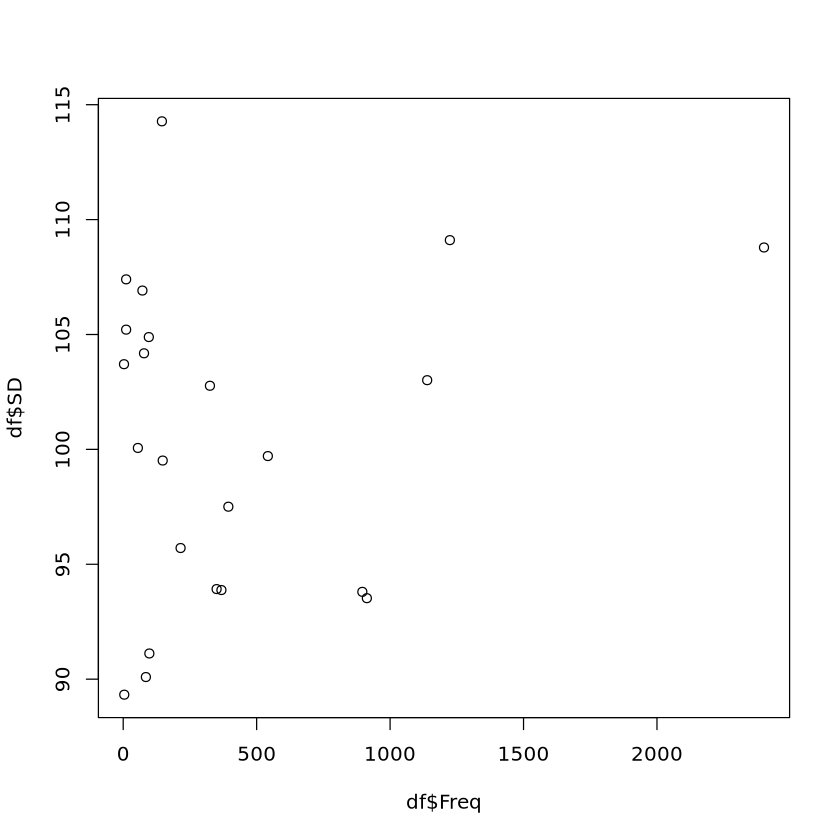

In [ ]:
library(dplyr)

df1 <- data.frame(Var1=all.ct, SD=sample.vec)
df2 <- as.data.frame(table(cell_meta$cell_subclass))
df <- merge(df1, df2, by="Var1")
plot(df$Freq, df$SD)